In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from os import path
from pydub import AudioSegment
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
import sounddevice as sd
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [46]:
rate, data = wavfile.read("assets_fish.wav")

In [47]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise
wavfile.write("fish_noised.wav", rate, audio_clip_band_limited)

In [48]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

In [49]:
# Função que fará o noise removal
def noise_removal(rate, data):
 
  reduced_noise = nr.reduce_noise(y=data, sr=rate)
  wavfile.write("assets_fish_reduced_noise.wav", rate, reduced_noise)

  return rate, reduced_noise

In [50]:
# Função que plotará o áudio
def plot_audio_data(data,rate):
  fig, ax = plt.subplots(figsize=(20,3))
  ax.plot(data)
  plt.title("Signal Audio")
  plt.xlabel("Time (ms)")
  plt.xlim([0, len(data)])
  plt.ylabel("")
  return IPython.display.Audio(data=data, rate=rate)

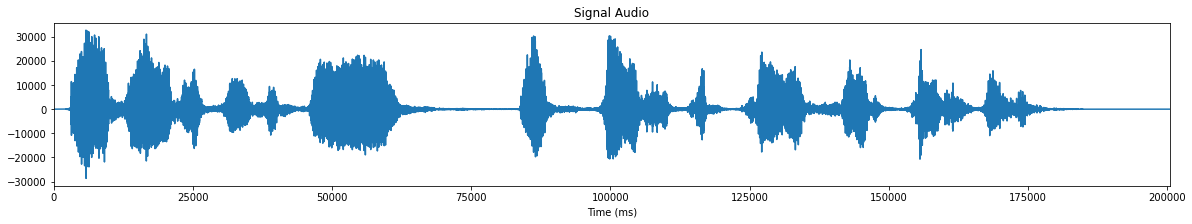

In [51]:
# Mostrando a forma de onda do áudio original
plot_audio_data(data, rate)

In [52]:
# Usando a função
rate_function, data_function = noise_removal(rate, data)

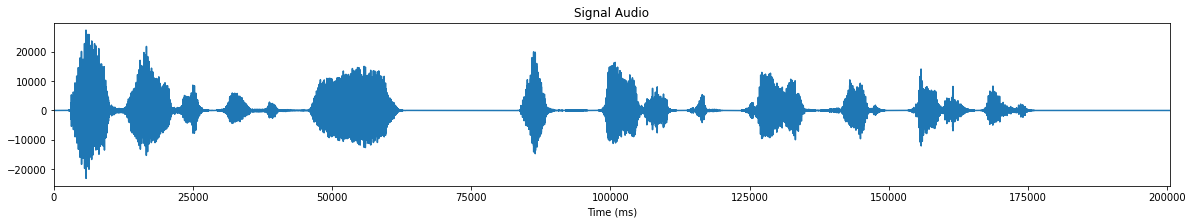

In [53]:
# Mostrando a forma de onda do áudio com ruído reduzido
plot_audio_data(data_function, rate_function)

In [54]:
# Tirando o ruído do áudio original
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

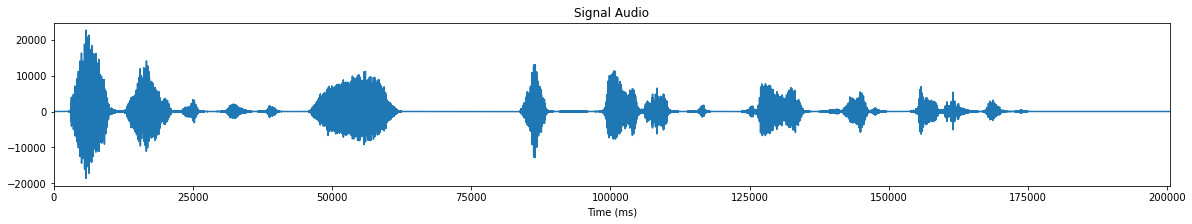

In [55]:
# Mostrando a forma de onda do áudio com ruído reduzido
plot_audio_data(reduced_noise, rate)

Referência Bibliográfica

https://pypi.org/project/noisereduce/#:~:text=Noise%20reduction%20in%20python%20using,a%20form%20of%20Noise%20Gate.
